# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Import `passengers.csv` and view the head.

In [2]:
# Read the dataset 'passengers.csv' and view the head

pasgr_data = pd.read_csv('passengers.csv')
pasgr_data.head()

# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [4]:
# Set month column as a timeseries object, and make it the index

# remember to set it to datetime object BEFORE indexing it!!!

pasgr_data['Month'] = pd.to_datetime(pasgr_data['Month'])
#pasgr_data.info()

pasgr_data.set_index('Month', inplace=True)
#pasgr_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# check the head and the new index
print(pasgr_data.head())
print(pasgr_data.index)

# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually incpect this time-series.

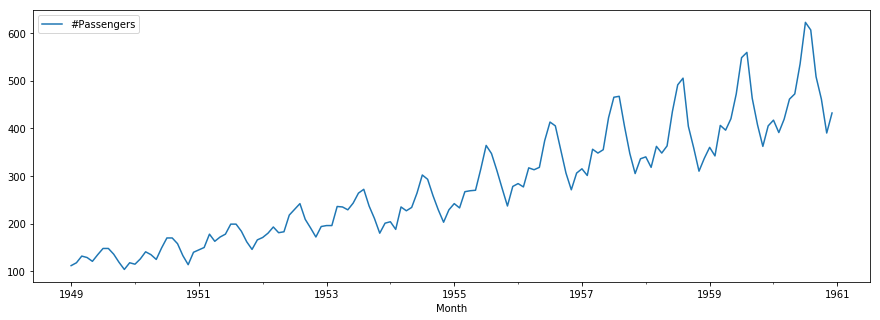

In [6]:
# Plot the time series data 

pasgr_data.plot(figsize=(15,5))
plt.show()

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [7]:
#Determine rolling statistics

#moving the average
rolmean = pasgr_data.rolling(window=12).mean()

#moing the variance
rolstd = pasgr_data.rolling(window=12).std()



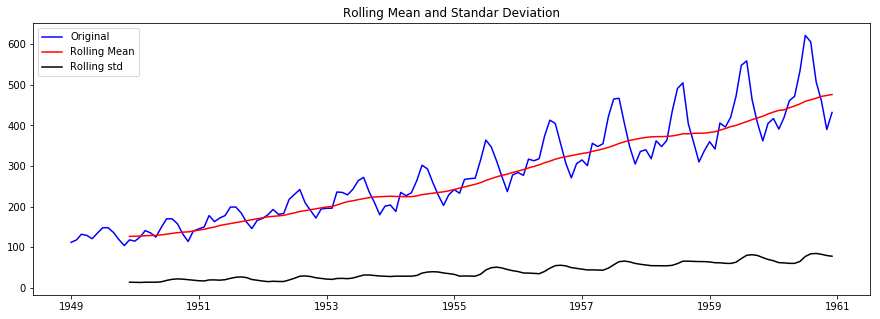

In [8]:
#Plot rolling statistics

plt.figure(figsize=(15,5))
orig = plt.plot(pasgr_data, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standar Deviation')

plt.show()

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [9]:
from statsmodels.tsa.stattools import adfuller

In [14]:
#Perform Dickey-Fuller test:
dftest = adfuller(pasgr_data['#Passengers'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print("Results of Dickey-Fuller Test:")
print(dfoutput)

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [15]:
#Read data

nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [16]:
#change to date object and index date column

nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

In [17]:
#verify changes

print(nyse.head())
print(nyse.index)

            monthly_return
Month                     
1961-01-01           0.082
1961-02-01           0.059
1961-03-01           0.050
1961-04-01           0.008
1961-05-01           0.042
DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '

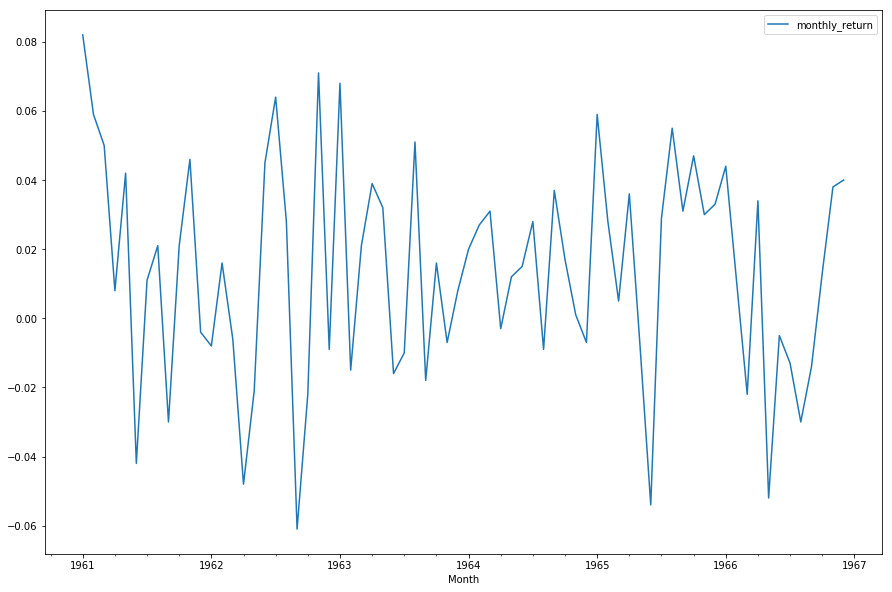

In [18]:
#plot time series data

nyse.plot(figsize=(15,10))
plt.show()

In [20]:
#Rolling statistics

#average
rolmean = nyse.rolling(window=12).mean()

#variance
rolstd = nyse.rolling(window=12).std()

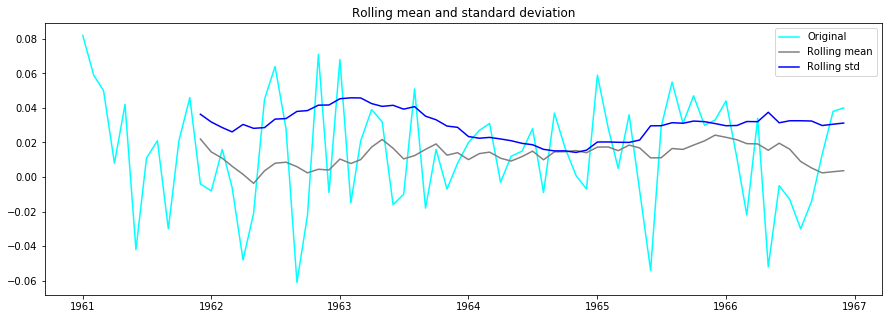

In [21]:
#plot rolling stats

plt.figure(figsize=(15,5))
orig = plt.plot(nyse, color='cyan', label='Original')
mean = plt.plot(rolmean, color='gray', label='Rolling mean')
std = plt.plot(rolstd, color='blue', label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show()

In [23]:
#Dickey-Fuller Test

dftest = adfuller(nyse['monthly_return'])
dfoutput = pd.Series(dftest[0:4], index=['Tests Statistic', 'P-value', '#lags', 'Observations'])

for key, value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value

print("Dickey-Fuller test results:")
print(dfoutput)

Dickey-Fuller test results:
Tests Statistic        -7.895375e+00
P-value                 4.325126e-12
#lags                   0.000000e+00
Observations            7.100000e+01
Critical value (1%)    -3.526005e+00
Critical value (5%)    -2.903200e+00
Critical value (10%)   -2.588995e+00
dtype: float64


## Summary

In this lab, we learnt to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!